# Clasificación - Predicción de sobrevivientes

In [1]:
#Carga de las librerías
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , precision_score , classification_report,confusion_matrix, recall_score, f1_score,roc_curve


In [2]:
#Ahora si cargamos los datos en jupyter!
data = pd.read_csv("titanic.csv")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## EDA 

In [3]:
#Analicemos brevemente el dataset
data.shape

(891, 15)

In [4]:
data.isna().sum() # verifico valores nulos 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Check for duplicate rows and delete
data.duplicated().sum()

107

In [6]:
data['survived'].value_counts() # Analizo la variable target

0    549
1    342
Name: survived, dtype: int64

In [7]:
data['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [8]:

data = data.drop('alive', axis = 1) # elimino la variable ya que se repite con la variable target

In [9]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True


In [10]:
data.describe() # estadísticos 

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Análisis de variables independientes

In [11]:
data['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [12]:
data['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [13]:
data['adult_male'].value_counts()

True     537
False    354
Name: adult_male, dtype: int64

In [14]:
data = data.drop ('who', axis =1) # ELIMINO VARIABLE WHO YA QUE ES IGUAL A LA VARIABLE SEX

In [15]:
data = data.drop('adult_male', axis = 1) # ELIMINO VARIABLE WHO YA QUE SE SUPERPONE A LA VARIABLE SEX
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,True


In [16]:
data['class'].value_counts() 

Third     491
First     216
Second    184
Name: class, dtype: int64

In [17]:
data['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [18]:
data = data.drop ('class', axis =1) # ELIMINO CLASS YA QUE ES IGUAL A LA VARIABLES PCLASS
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,C,Cherbourg,True


In [19]:
data['alone'].value_counts()

True     537
False    354
Name: alone, dtype: int64

In [20]:
data['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [21]:
data['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [22]:
data['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [23]:
data = data.drop ('embark_town', axis =1) # elimino la variable ya que se repite con la variable embarked
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,C,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,C,False
4,0,3,male,35.0,0,0,8.0500,S,NaN,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,True
887,1,1,female,19.0,0,0,30.0000,S,B,True
888,0,3,female,NaN,1,2,23.4500,S,NaN,False
889,1,1,male,26.0,0,0,30.0000,C,C,True


In [24]:
data['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

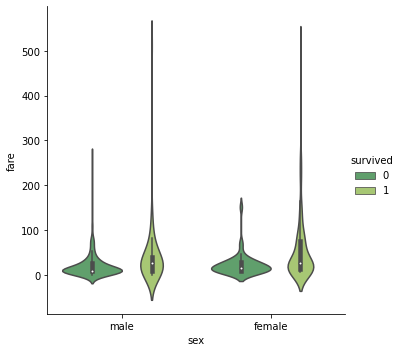

In [25]:
sns.catplot(x ='sex',y = 'fare', split = False, hue = 'survived', data=data, kind='violin', palette='summer')

In [26]:
data.loc[(data['deck'].isnull ()== True), 'deck'] = 1
data.loc[(data['deck'] == 1), 'deck'] =0 

In [27]:
data= pd.get_dummies(data, columns = ['deck'], drop_first=True) # reazo dummies de la variable deck

In [28]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,male,22.0,1,0,7.2500,S,False,0,0,0,0,0,0,0
1,1,1,female,38.0,1,0,71.2833,C,False,0,0,1,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,True,0,0,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,False,0,0,1,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,S,True,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,True,0,0,0,0,0,0,0
887,1,1,female,19.0,0,0,30.0000,S,True,0,1,0,0,0,0,0
888,0,3,female,NaN,1,2,23.4500,S,False,0,0,0,0,0,0,0
889,1,1,male,26.0,0,0,30.0000,C,True,0,0,1,0,0,0,0


In [29]:
data['embarked'].isna().sum()

2

In [30]:
data['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [31]:
data.loc[(data['embarked'].isnull ()== True), 'embarked'] = 'S' #relleno valores nulos con la moda

In [32]:
data['embarked'].isna().sum()

0

In [33]:
data= pd.get_dummies(data, columns = ['sex'], drop_first=True) # dummies en la variable sex

In [34]:
data

,survived,pclass,age,sibsp,parch,fare,embarked,alone,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,sex_male
0,0,3,22.0,1,0,7.2500,S,False,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,False,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,S,True,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,S,False,0,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,S,True,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,True,0,0,0,0,0,0,0,1
887,1,1,19.0,0,0,30.0000,S,True,0,1,0,0,0,0,0,0
888,0,3,NaN,1,2,23.4500,S,False,0,0,0,0,0,0,0,0
889,1,1,26.0,0,0,30.0000,C,True,0,0,1,0,0,0,0,1


In [35]:
data= pd.get_dummies(data, columns = ['alone'], drop_first=True) # dummies en la variable alone
data

,survived,pclass,age,sibsp,parch,fare,embarked,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,sex_male,alone_True
0,0,3,22.0,1,0,7.2500,S,0,0,0,0,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,C,0,0,1,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,S,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,0,0,0,0,0,0,1,1
887,1,1,19.0,0,0,30.0000,S,0,1,0,0,0,0,0,0,1
888,0,3,NaN,1,2,23.4500,S,0,0,0,0,0,0,0,0,0
889,1,1,26.0,0,0,30.0000,C,0,0,1,0,0,0,0,1,1


<AxesSubplot:>

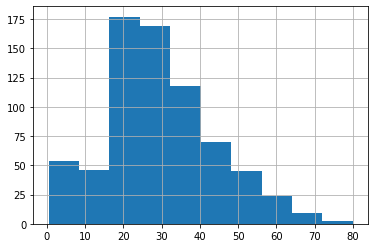

In [36]:
data['age'].hist()

C:\Users\juarezg\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

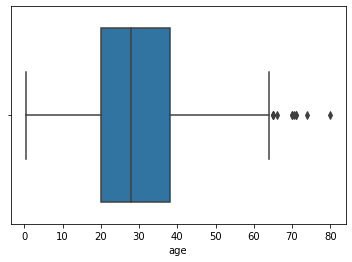

In [37]:
sns.boxplot(data['age']) # hay outlieres

In [38]:
data.loc[(data['age'].isnull ()== True), 'age'] = data['age'].median() # relleno los valres nulos con la mediana

In [39]:
data.isna().sum() # no hay valores nulos

survived      0
pclass        0
age           0
sibsp         0
parch         0
fare          0
embarked      0
deck_A        0
deck_B        0
deck_C        0
deck_D        0
deck_E        0
deck_F        0
deck_G        0
sex_male      0
alone_True    0
dtype: int64

In [40]:
data= pd.get_dummies(data, columns = ['embarked'], drop_first=True) # dummies a la variable

## Matriz de gráficos

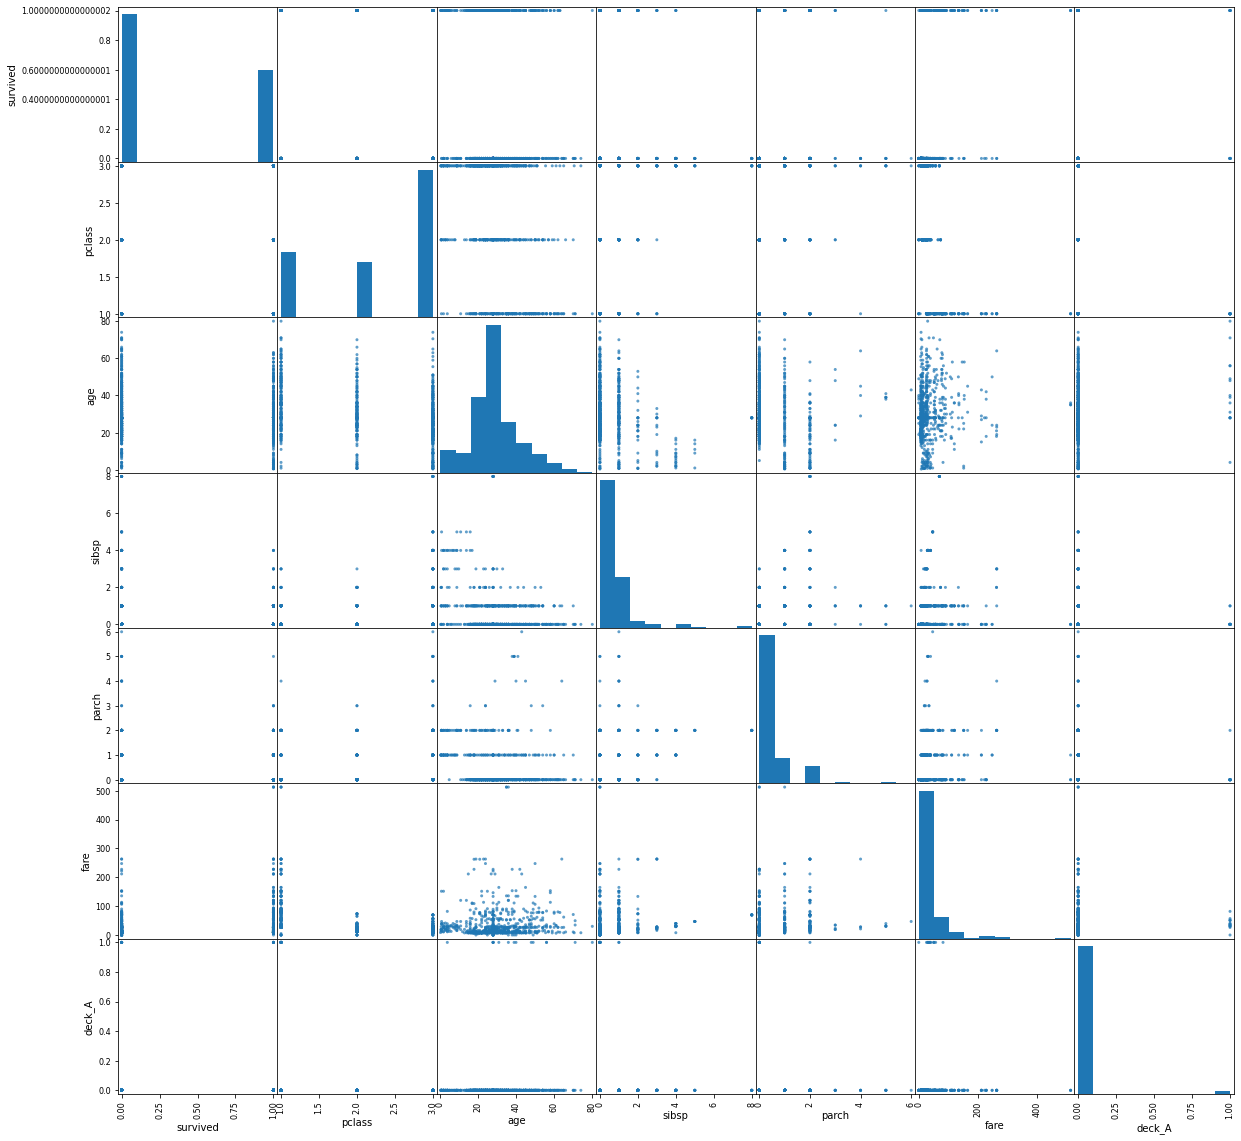

In [41]:
_=pd.plotting.scatter_matrix(data.iloc[:,0:7],figsize=(20, 20), alpha=0.7) 


## Matriz de Correlación

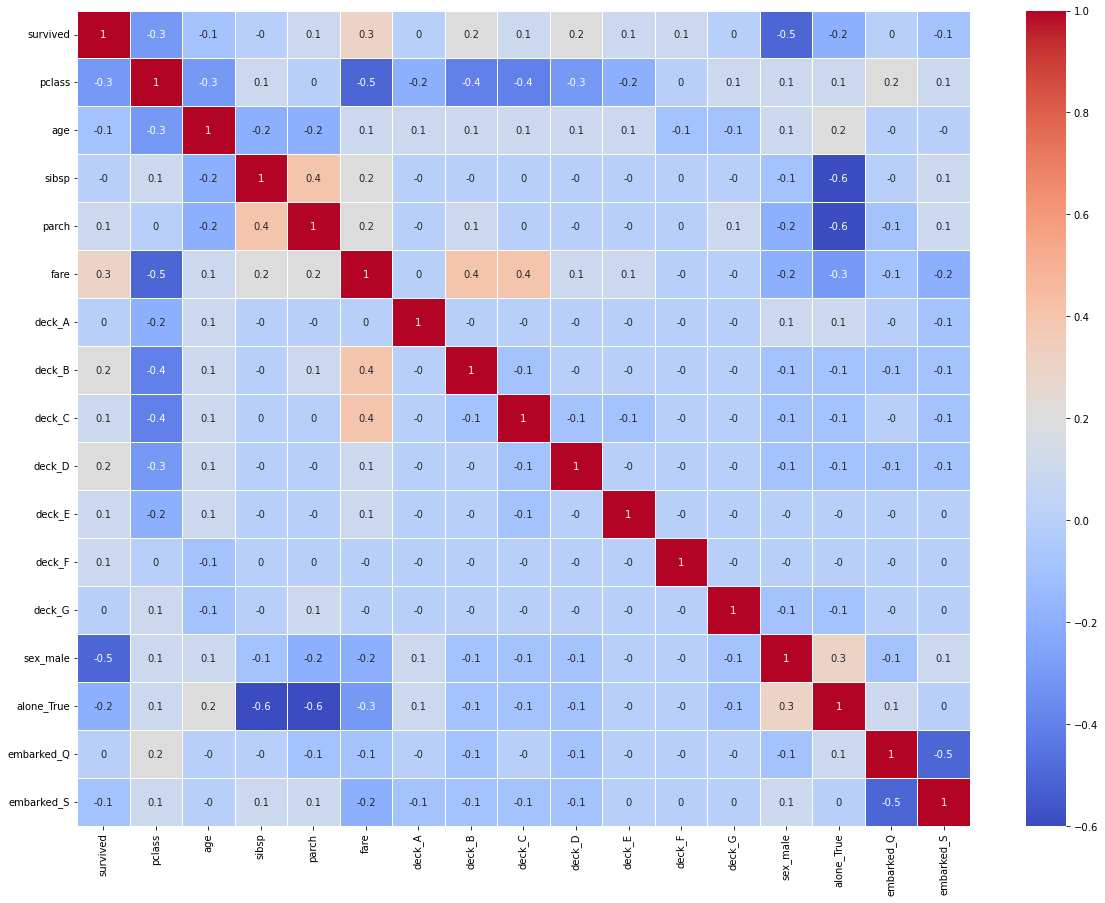

In [42]:
plt.figure(figsize=(20,15))
sns.heatmap(round(data.corr(),1), cmap="coolwarm", annot=True, linewidths=.5)

plt.show()


In [43]:
data = data.drop('deck_A', axis =1) # elimino las variables que no correlacionan
data = data.drop('deck_B', axis =1)
data = data.drop('deck_C', axis =1)
data = data.drop('deck_D', axis =1)
data = data.drop('deck_E', axis =1)
data = data.drop('deck_F', axis =1)
data = data.drop('deck_G', axis =1)

**Insights**:

* El dataset se compone de 10 columnas de las cuales 9 corresponden a variables independientes, que usaremos para predecir el target. 

* Classification es la variable a predecir. Todas las variables son numéricas, ya sea enteras o reales y no tiene valores nulos.

## Entrenamiento y Testeo

In [44]:
#Separamos en X e y
X = data.drop(["survived"], axis=1)
y = data["survived"]

In [45]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.20,
                                    random_state=42)

In [46]:
#Creamos un svc
svc = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state = 42)
svc.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), random_state=42)

In [47]:
y_train_pred = svc.predict(X_train) #Prediccion en Train

In [48]:
y_test_pred = svc.predict(X_test) #Prediccion en Test

Text(0.5, 33.0, 'Predicted class')

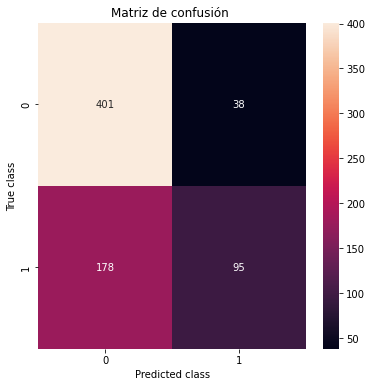

In [49]:
#train
conf_matrix = confusion_matrix(y_train,(y_train_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión ")
plt.ylabel('True class')
plt.xlabel('Predicted class')

Text(0.5, 33.0, 'Predicted class')

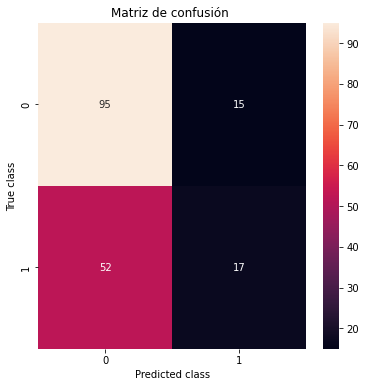

In [50]:
# Test
conf_matrix = confusion_matrix(y_test,(y_test_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión ")
plt.ylabel('True class')
plt.xlabel('Predicted class')


In [51]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6256983240223464


In [52]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)



% de aciertos sobre el set de entrenamiento: 0.6966292134831461
% de precision sobre el set de entrenamiento: 0.7142857142857143
% de recall sobre el set de entrenamiento: 0.34798534798534797
% de f1 sobre el set de entrenamiento: 0.46798029556650245

% de aciertos sobre el set de evaluación: 0.6256983240223464
% de precision sobre el set de evaluación: 0.53125
% de recall sobre el set de evaluación: 0.2463768115942029
% de f1 sobre el set de evaluación: 0.33663366336633666


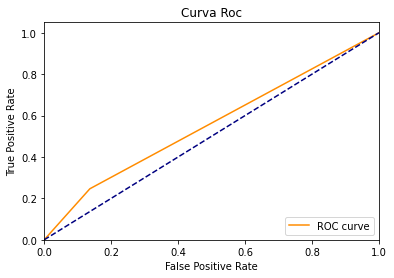

In [53]:

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc')
plt.legend(loc="lower right")
plt.show()

In [54]:
#Creamos un random forest! con RandomizedSearchCV

param_distribs = {'n_estimators': randint (low = 1, high =200),
              'max_depth': randint (low =2, high =4),
              }

random = RandomForestClassifier()
#Utilizamos la grilla definida anteriormente...
model = RandomizedSearchCV(random, param_distributions=param_distribs, cv=2)
model.fit(X_train, y_train)


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000257E535BCA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000257E465FAC0>})

In [55]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test) #Prediccion en Test


Text(0.5, 33.0, 'Predicted class')

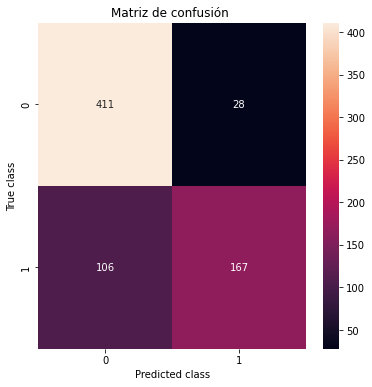

In [56]:
conf_matrix = confusion_matrix(y_train,(y_train_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión ")
plt.ylabel('True class')
plt.xlabel('Predicted class')

Text(0.5, 33.0, 'Predicted class')

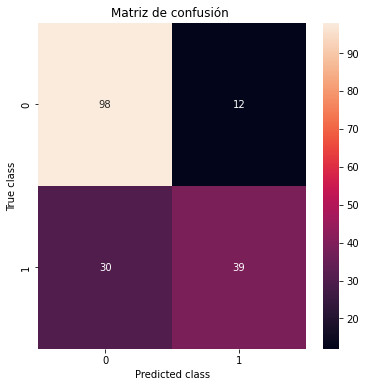

In [57]:
# Test
conf_matrix = confusion_matrix(y_test,(y_test_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión ")
plt.ylabel('True class')
plt.xlabel('Predicted class')


In [58]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor estimador: "+str(model.best_estimator_)+'\n')
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'max_depth': 3, 'n_estimators': 15}
Mejor estimador: RandomForestClassifier(max_depth=3, n_estimators=15)

Mejor Score: 0.797752808988764



% de aciertos sobre el set de entrenamiento: 0.8117977528089888
% de precision sobre el set de entrenamiento: 0.8564102564102564
% de recall sobre el set de entrenamiento: 0.6117216117216118
% de f1 sobre el set de entrenamiento: 0.7136752136752136

% de aciertos sobre el set de evaluación: 0.7653631284916201
% de precision sobre el set de evaluación: 0.7647058823529411
% de recall sobre el set de evaluación: 0.5652173913043478
% de f1 sobre el set de evaluación: 0.65


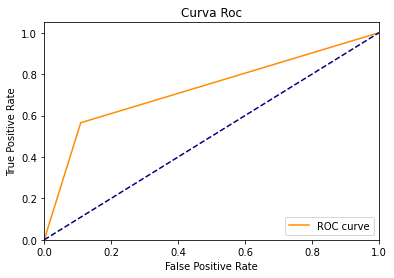

In [59]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo de Scores  Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)

#Calculo CURVA ROC

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc')
plt.legend(loc="lower right")
plt.show()

In [60]:
# BAYES
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [61]:
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test) #Prediccion en Test


Text(0.5, 33.0, 'Predicted class')

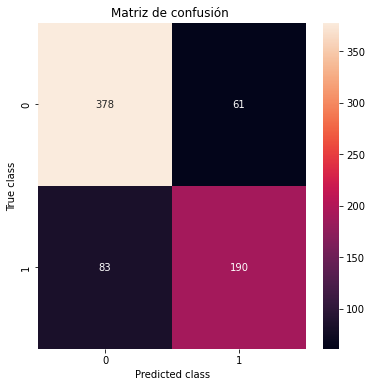

In [62]:
conf_matrix = confusion_matrix(y_train,(y_train_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión ")
plt.ylabel('True class')
plt.xlabel('Predicted class')

Text(0.5, 33.0, 'Predicted class')

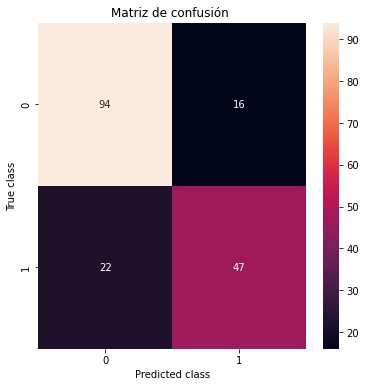

In [63]:
# Test
conf_matrix = confusion_matrix(y_test,(y_test_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión ")
plt.ylabel('True class')
plt.xlabel('Predicted class')


In [64]:
gnb.predict_proba(X_test) # Probabilidades


array([[9.87297181e-01, 1.27028189e-02],
       [9.37998353e-01, 6.20016474e-02],
       [9.26182623e-01, 7.38173769e-02],
       [9.89340356e-01, 1.06596444e-02],
       [3.42754025e-02, 9.65724598e-01],
       [3.40271626e-01, 6.59728374e-01],
       [3.61661071e-01, 6.38338929e-01],
       [8.34305782e-01, 1.65694218e-01],
       [1.03653434e-02, 9.89634657e-01],
       [8.93064151e-01, 1.06935849e-01],
       [7.72733586e-01, 2.27266414e-01],
       [9.85539452e-01, 1.44605476e-02],
       [5.39483265e-01, 4.60516735e-01],
       [6.29349769e-01, 3.70650231e-01],
       [1.04153873e-09, 9.99999999e-01],
       [7.65159396e-01, 2.34840604e-01],
       [9.69632183e-01, 3.03678167e-02],
       [9.78992995e-01, 2.10070051e-02],
       [9.74232871e-01, 2.57671292e-02],
       [3.59451501e-01, 6.40548499e-01],
       [9.78992995e-01, 2.10070051e-02],
       [1.31728092e-01, 8.68271908e-01],
       [9.79458106e-01, 2.05418939e-02],
       [2.94948949e-01, 7.05051051e-01],
       [9.792228

% de aciertos sobre el set de entrenamiento: 0.797752808988764
% de precision sobre el set de entrenamiento: 0.7569721115537849
% de recall sobre el set de entrenamiento: 0.6959706959706959
% de f1 sobre el set de entrenamiento: 0.7251908396946565

% de aciertos sobre el set de evaluación: 0.7877094972067039
% de precision sobre el set de evaluación: 0.746031746031746
% de recall sobre el set de evaluación: 0.6811594202898551
% de f1 sobre el set de evaluación: 0.7121212121212122


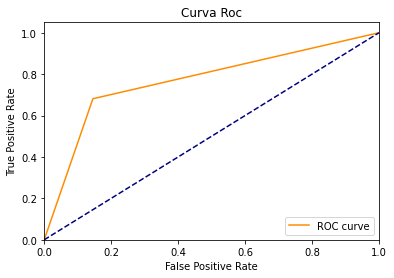

In [65]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo de Scores  Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)

#Calculo CURVA ROC

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc')
plt.legend(loc="lower right")
plt.show()

In [66]:
#Creamos un KNN
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=15)

In [67]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test) #Prediccion en Test

Text(0.5, 33.0, 'Predicted class')

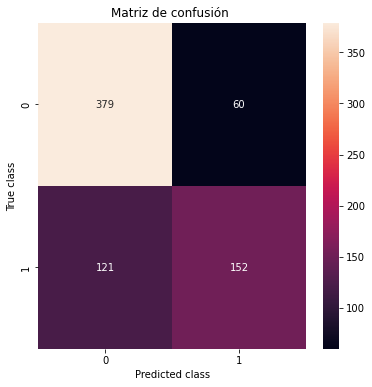

In [68]:
#train
conf_matrix = confusion_matrix(y_train,(y_train_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión ")
plt.ylabel('True class')
plt.xlabel('Predicted class')

Text(0.5, 33.0, 'Predicted class')

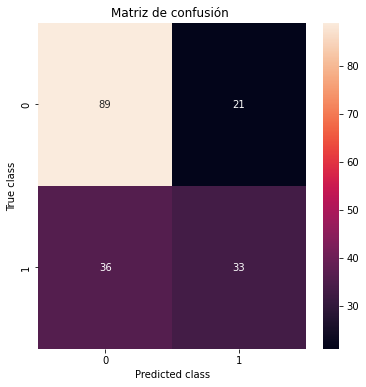

In [69]:
# Test
conf_matrix = confusion_matrix(y_test,(y_test_pred).astype(int))
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt="d");
plt.title("Matriz de confusión ")
plt.ylabel('True class')
plt.xlabel('Predicted class')

% de aciertos sobre el set de entrenamiento: 0.7457865168539326
% de precision sobre el set de entrenamiento: 0.7169811320754716
% de recall sobre el set de entrenamiento: 0.5567765567765568
% de f1 sobre el set de entrenamiento: 0.6268041237113402

% de aciertos sobre el set de evaluación: 0.6815642458100558
% de precision sobre el set de evaluación: 0.6111111111111112
% de recall sobre el set de evaluación: 0.4782608695652174
% de f1 sobre el set de evaluación: 0.5365853658536586


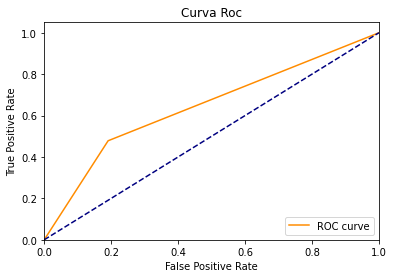

In [70]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo de Scores  Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)

#Calculo CURVA ROC

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc')
plt.legend(loc="lower right")
plt.show()

In [71]:
#Creamos KNN con GridSearch CV
param_grid = {'n_neighbors':[8,15,20],
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,6,9],
              'algorithm':['auto', 'kd_tree']}

knn = KNeighborsClassifier()
#Utilizamos la grilla definida anteriormente...

model = GridSearchCV(knn, param_grid=param_grid, cv=10)

In [72]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test) #Prediccion en Test

In [73]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor estimador: "+str(model.best_estimator_)+'\n')
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 15, 'weights': 'distance'}
Mejor estimador: KNeighborsClassifier(leaf_size=1, n_neighbors=15, weights='distance')

Mejor Score: 0.7445031298904538



% de aciertos sobre el set de entrenamiento: 0.9817415730337079
% de precision sobre el set de entrenamiento: 0.9887218045112782
% de recall sobre el set de entrenamiento: 0.9633699633699634
% de f1 sobre el set de entrenamiento: 0.9758812615955473

% de aciertos sobre el set de evaluación: 0.7150837988826816
% de precision sobre el set de evaluación: 0.6451612903225806
% de recall sobre el set de evaluación: 0.5797101449275363
% de f1 sobre el set de evaluación: 0.6106870229007634


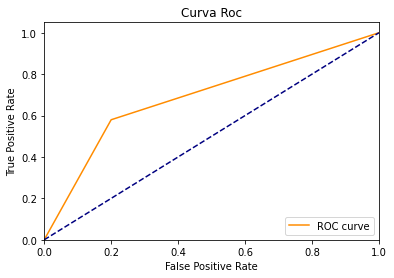

In [74]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train , y_train_pred)
train_recall = recall_score(y_train , y_train_pred)
train_f1 = f1_score(y_train , y_train_pred)

#Calculo de Scores  Test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test , y_test_pred)
test_recall = recall_score(y_test , y_test_pred)
test_f1 = f1_score(y_test , y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de precision sobre el set de entrenamiento:', train_precision)
print('% de recall sobre el set de entrenamiento:', train_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de entrenamiento:', train_f1)
print('')
print('% de aciertos sobre el set de evaluación:',test_accuracy)
print('% de precision sobre el set de evaluación:', test_precision)#porcentaje de valores que se han clasificado como positivos son realmente positivos.
print('% de recall sobre el set de evaluación:', test_recall) # cuantos valores positivos son correctamente clasificados.
print('% de f1 sobre el set de evaluación:', test_f1)

#Calculo CURVA ROC

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva Roc')
plt.legend(loc="lower right")
plt.show()

In [75]:
#Veamos los resultados obtenidos
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010472,0.001324,0.009530,0.003450,auto,1,8,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.680556,...,0.549296,0.760563,0.732394,0.802817,0.718310,0.704225,0.760563,0.710779,0.065877,25
1,0.011061,0.003167,0.006636,0.002519,auto,1,8,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.680556,...,0.605634,0.816901,0.704225,0.816901,0.802817,0.760563,0.802817,0.740356,0.069591,7
2,0.011418,0.006205,0.012843,0.004737,auto,1,15,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.694444,...,0.619718,0.718310,0.788732,0.746479,0.704225,0.690141,0.704225,0.702367,0.048576,31
3,0.007388,0.006574,0.009891,0.007114,auto,1,15,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.694444,...,0.647887,0.760563,0.760563,0.774648,0.760563,0.816901,0.760563,0.744503,0.045375,1
4,0.012012,0.007458,0.008789,0.006486,auto,1,20,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.694444,...,0.690141,0.718310,0.746479,0.746479,0.774648,0.788732,0.732394,0.724863,0.039173,19
5,0.008695,0.007207,0.004595,0.007175,auto,1,20,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.638889,...,0.661972,0.746479,0.732394,0.746479,0.774648,0.802817,0.788732,0.730536,0.051644,13
6,0.005795,0.005251,0.007310,0.006811,auto,6,8,uniform,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.680556,...,0.549296,0.760563,0.732394,0.802817,0.718310,0.704225,0.760563,0.710779,0.065877,25
7,0.003769,0.006150,0.004054,0.006766,auto,6,8,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.680556,...,0.605634,0.816901,0.704225,0.816901,0.802817,0.760563,0.788732,0.738948,0.068445,9
8,0.003827,0.005882,0.009487,0.008169,auto,6,15,uniform,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.694444,...,0.619718,0.718310,0.788732,0.746479,0.690141,0.690141,0.704225,0.700959,0.048706,33
9,0.006035,0.007208,0.002576,0.005145,auto,6,15,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.694444,...,0.647887,0.760563,0.760563,0.774648,0.760563,0.816901,0.760563,0.744503,0.045375,1
